# Shift of Hologram

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [3]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy import units as u
from astropy.utils.data import get_pkg_data_filename

In [4]:
from IPython.display import Image


In [5]:
from pyds9 import *


An instance of ds9 was found to be running before we could
start the 'xpans' name server. You will need to perform a
bit of manual intervention in order to connect this
existing ds9 to Python.

For ds9 version 5.7 and beyond, simply register the
existing ds9 with the xpans name server by selecting the
ds9 File->XPA->Connect menu option. Your ds9 will now be
fully accessible to pyds9 (e.g., it appear in the list
returned by the ds9_targets() routine).

For ds9 versions prior to 5.7, you cannot (easily) register
with xpans, but you can view ds9's File->XPA Information
menu option and pass the value associated with XPA_METHOD
directly to the Python DS9() constructor, e.g.:

    d = DS9('a000101:12345')

The good news is that new instances of ds9 will be
registered with xpans, and will be known to ds9_targets()
and the DS9() constructor.



In [6]:
print ds9_targets()

None


In [7]:
d=DS9()

In [8]:
ds9_cmd="file reduced_HD14943_20170117_093.fits"

In [9]:
d.set(ds9_cmd) 

1

In [10]:
#d.set("file reduced_HD60753_20170117_210.fits") 

In [11]:
hdul = d.get_pyfits()

In [12]:
!ls

CaptScr_HD14943.png               reduced_HD14943_20170117_093.fits
Hologram_Shift.ipynb              reduced_HD60753_20170117_210.fits


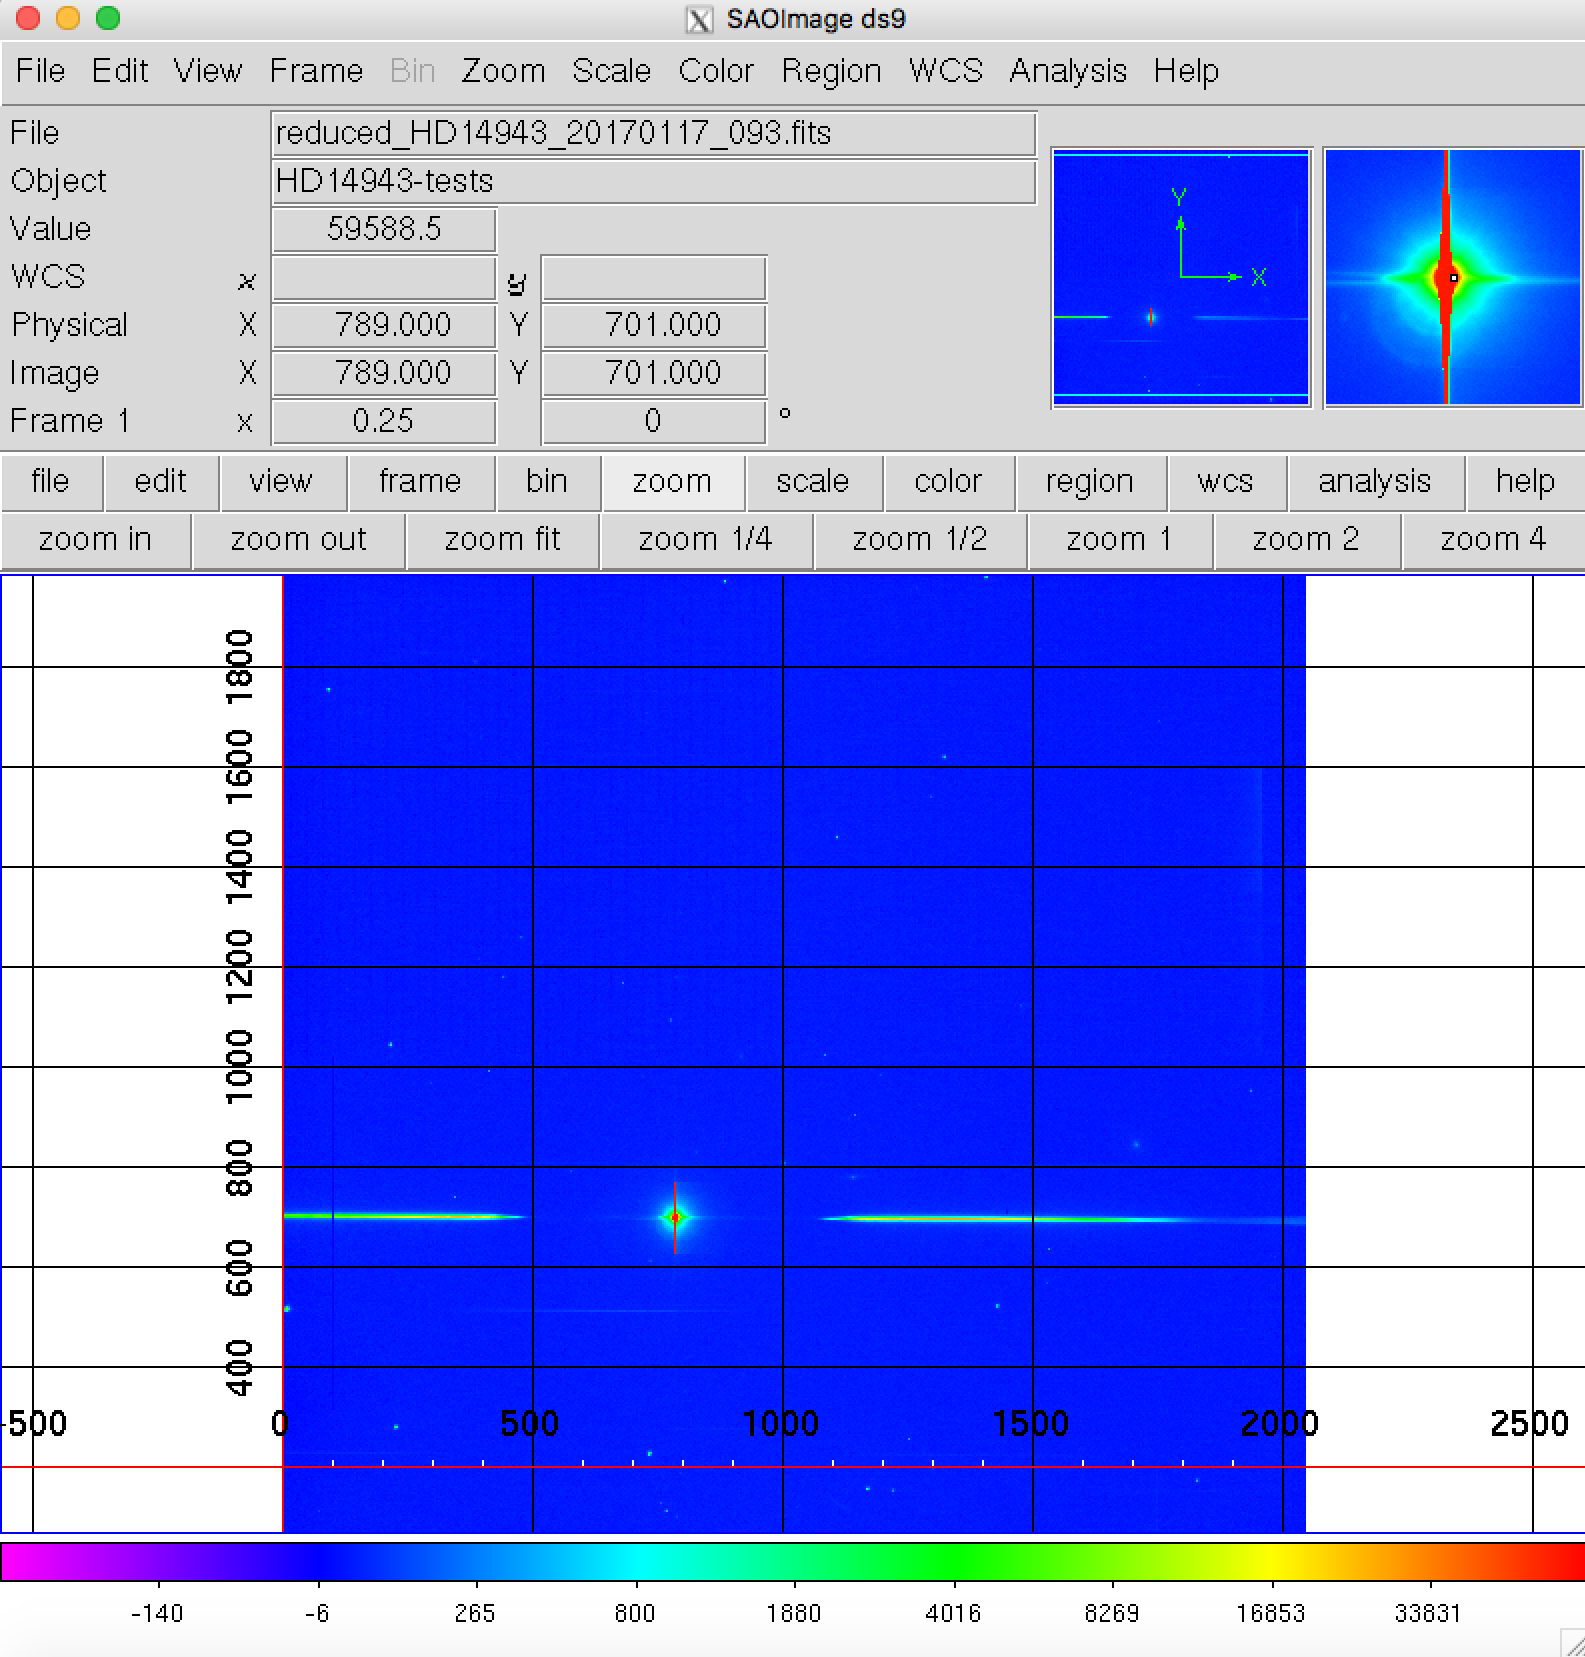

In [13]:
Image("CaptScr_HD14943.png",width=500, height=500)

In [14]:
hdul.info()

Filename: StringIO.StringIO
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     143   (2048, 2048)   float64   


In [15]:
hdul[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 /                                                
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD14943-tests'      / Name of object observed                        
OBSERVER= 'Mondrik '           / observer                                       
PROPID  = 'Stubbs  '           / Proposal ID                                    
RECID   = 'ct36.20170118.022139' / NOAO Archibe record ID                       
PROPID  = 'Stubbs  '           / Proposal ID                                    
IMAGETYP= 'object  '        

In [16]:
wcs = WCS(hdul[0].header)

In [17]:
image_data = hdul[0].data

## Taille de l'image

In [18]:
CCD_size=image_data.shape

In [19]:
print 'CCD_size=',CCD_size

CCD_size= (2048, 2048)


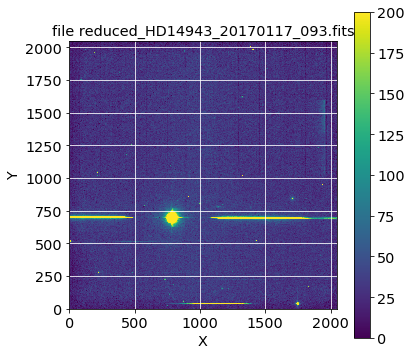

In [20]:
#plt.subplot(projection=wcs)
plt.imshow(image_data)
plt.imshow(image_data,origin='lower',vmin=0,vmax=200)
plt.colorbar()
plt.grid(color='white', ls='solid')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(ds9_cmd)

## Extract lines Columns and Row

In [21]:
Column=image_data[:,500:1000]

In [22]:
Row=image_data[600:800,:]

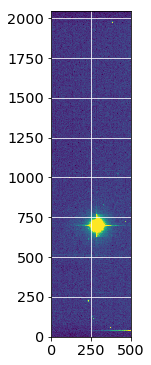

In [23]:
plt.imshow(Column,origin='lower',vmin=0,vmax=200)
plt.grid(color='white', ls='solid')

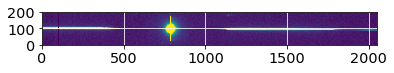

In [24]:
plt.imshow(Row,origin='lower',vmin=0,vmax=500)
plt.grid(color='white', ls='solid')

## Profile along Y

In [25]:
Profile_Y=Column.sum(axis=1)

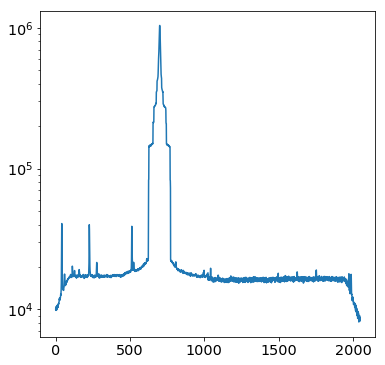

In [26]:
plt.semilogy(Profile_Y)

In [27]:
max_y=np.where(Profile_Y==Profile_Y.max())[0][0]

In [28]:
max_y

700

## Profile along X

In [29]:
Profile_X=Row.sum(axis=0)

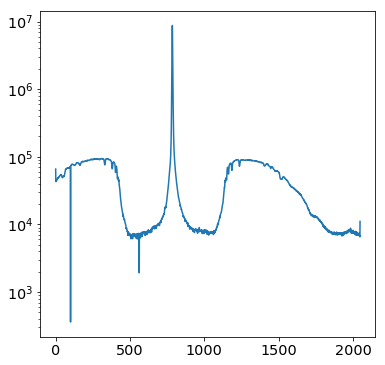

In [30]:
plt.semilogy(Profile_X)

In [31]:
max_x=np.where(Profile_X==Profile_X.max())[0][0]

### pixel index where is the maximum of intensity of the star

In [32]:
print "(X,Y)=",max_x,',',max_y

(X,Y)= 785 , 700


## Shift in X and Y in pixels wrt CCD center

In [33]:
X0=CCD_size[1]/2.
Y0=CCD_size[0]/2.

In [34]:
DX_pix=max_x-X0
DY_pix=max_y-Y0

In [35]:
DX_pix_max=1024
DY_pix_max=1024

In [36]:
print 'shift at CCD (DX_pix,DY_pix)=',DX_pix,',',DY_pix,'pixels'

shift at CCD (DX_pix,DY_pix)= -239.0 , -324.0 pixels


## parameters at CTIO

In [37]:
focal_length=12.6*u.m

In [38]:
pixel_size=24*u.micron

In [39]:
distance_ccd_hologram=57.69*u.mm

## Shift in CCD plane

In [40]:
DX0=(DX_pix*pixel_size).to(u.mm)  
DY0=(DY_pix*pixel_size).to(u.mm)  
DX0MAX=(DX_pix_max*pixel_size).to(u.cm)  
DY0MAX=(DX_pix_max*pixel_size).to(u.cm)  

In [41]:
print DX0,DY0

-5.736 mm -7.776 mm


In [42]:
print DX0MAX,DY0MAX

2.4576 cm 2.4576 cm


In [43]:
angle_per_pixel=((pixel_size/focal_length)*u.rad).to(u.arcsec)

In [44]:
print 'angle_per_pixel=',angle_per_pixel

angle_per_pixel= 0.392885345233 arcsec


In [45]:
theta_x=(angle_per_pixel*DX_pix).to(u.arcmin) # in arcmin

In [46]:
theta_y=(angle_per_pixel*DY_pix).to(u.arcmin) # in arcmin

In [47]:
theta_x_max=(angle_per_pixel*DX_pix_max).to(u.arcmin) # in arcmin
theta_y_max=(angle_per_pixel*DY_pix_max).to(u.arcmin) # in arcmin

## Star direction in telescope FOV

In [48]:
print "(theta_x, theta_y) = ",theta_x, ',',theta_y

(theta_x, theta_y) =  -1.56499329184 arcmin , -2.12158086426 arcmin


In [49]:
print "(theta_x_max, theta_y_max) = ",theta_x_max, ',',theta_y_max

(theta_x_max, theta_y_max) =  6.7052432253 arcmin , 6.7052432253 arcmin


## Shift at Hologram

In [50]:
DX_Holo=DX0-distance_ccd_hologram*np.tan(theta_x)
DY_Holo=DY0-distance_ccd_hologram*np.tan(theta_y)

In [51]:
DX_Holo,DY_Holo

(<Quantity -5.709737312471472 mm>, <Quantity -7.740397024051449 mm>)